<a href="https://colab.research.google.com/github/lhiwi/AI-Principles_-advanced-searching/blob/main/DFS_and_BFS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BFS and DFS implementation**

---



# **The state space graph for the map on fig 1**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
graph = {'Addis Ababa': {'Adama', 'Ambo', 'Debre Berhan'},
             'Adama': {'Matahara', 'Asella', 'Batu', 'Addis Ababa'},
             'Ambo': {'Wolkite', 'Addis Ababa', 'Nekemte'},
             'Debre Berhan': {'Addis Ababa', 'Debre Sina'},
             'Matahara': {'Adama', 'Awash'},
             'Asella': {'Adama', 'Assasa'},
             'Batu': {'Adama', 'Buta Jirra', 'Shashamene'},
             'Wolkite': {'Ambo', 'Worabe', 'Jimma'},
             'Nekemte': {'Ambo', 'Bedelle', 'Gimbi'},
             'Debre Sina': {'Debre Berhan', 'Kemise', 'Debre Markos'},
             'Awash': {'Chiro', 'Gobi Rasu', 'Matahara'},
             'Assasa': {'Asella', 'Dodolla'},
             'Buta Jirra': {'Batu', 'Worabe'},
             'Shashamene': {'Batu', 'Hawassa', 'Dodolla', 'Hossana'},
             'Worabe': {'Wolkite', 'Hossana', 'Buta Jirra'},
             'Jimma': {'Wolkite', 'Bonga', 'Bedelle'},
            'Bedelle': {'Nekemte', 'Gore', 'Jimma'},
             'Gimbi': {'Nekemte', 'Dambidollo'},
             'Kemise': {'Debre Sina', 'Dessie'},
             'Debre Markos': {'Debre Sina', 'Finote Selam'},
             'Chiro': {'Awash', 'Dire Dawa'},
             'Gobi Rasu': {'Awash', 'Samara'},
             'Dodolla': {'Assasa', 'Shashamene', 'Bale'},
             'Hawassa': {'Shashamene', 'Dilla'},
             'Hossana': {'Shashamene', 'Worabe', 'Wolaita Sodo'},
             'Bonga': {'Jimma', 'Dawro', 'Tepi', 'Mizan Teferi'},
             'Gore': {'Tepi', 'Gambella', 'Bedelle'},
             'Dambidollo': {'Gimbi', 'Assosa', 'Gambella'},
            'Dessie': {'Kemise', 'Woldia'},
            'Finote Selam': {'Debre Markos', 'Bahirdar', 'Injibara'},
             'Dire Dawa': { 'Chiro', 'Harar'},
             'Samara': { 'Gobi Rasu', 'Fanti Rasu', 'Alamata', 'Woldia'},
            'Bale': {'Liben', 'Dodolla', 'Goba', 'Sof Oumer'},
             'Dilla': {'Hawassa', 'Bulehora'},
             'Wolaita Sodo': {'Arba Minchi', 'Dawro', 'Hossana'},
             'Dawro': { 'Bonga', 'Basketo', 'Wolaita Sodo'},
             'Tepi': {'Gore', 'Bonga', 'Mizan Teferi'},
            'Mizan Teferi': {'Tepi', 'Bonga', 'Basketo'},
             'Gambella': {'Gore', 'Dambidollo'},
             'Assosa': {'Dambidollo', 'Metekel'},
            'Woldia': {'Dessie', 'Lalibella', 'Samara', 'Alamata'},
             'Bahirdar': {'Finote Selam', 'Injibara', 'Metekel', 'Azezo', 'Debre Tabor'},
             'Injibara': {'Bahirdar', 'Finote Selam'},
             'Harar': { 'Dire Dawa', 'Babile'},
             'Fanti Rasu': {'Samara', 'Kilbet Rasu'},
             'Alamata': {'Samara', 'Woldia', 'Mekelle', 'Sekota'},
             'Liben': {'Bale'},
             'Goba': {'Bale', 'Sof Oumer', 'Dega Habur'},
             'Sof Oumer': {'Goba', 'Bale', 'Kebri Dehar'},
            'Bulehora': { 'Dilla', 'Yabello'},
            'Arba Minchi': {'Wolaita Sodo', 'Konso', 'Basketo'},
             'Basketo': { 'Arba Minchi', 'Dawro', 'Mizan Teferi', 'Benchi Maji'},
             'Metekel': { 'Assosa', 'Bahirdar'},
             'Lalibella': {'Woldia', 'Debre Tabor', 'Sekota'},
             'Debre Tabor': {'Lalibella', 'Bahirdar'},
             'Azezo': {'Gondar', 'Bahirdar', 'Metema'},
             'Babile': { 'Harar', 'Jigjiga'},
             'Kilbet Rasu': {'Fanti Rasu' },
             'Mekelle': {'Alamata', 'Adwa', 'Adigrat', 'Sekota'},
             'Sekota': {'Alamata', 'Mekelle', 'Lalibella'},
            'Dega Habur': {'Goba', 'Jigjiga', 'Kebri Dehar'},
            'Kebri Dehar': {'Gode', 'Sof Oumer', 'Dega Habur', 'Werdez'},
            'Yabello': { 'Bulehora', 'Konso', 'Moyale'},
            'Konso': {'Arba Minchi', 'Yabello'},
            'Benchi Maji': { 'Basketo'},
            'Gondar': { 'Azezo', 'Metema', 'Debarke'},
            'Metema': { 'Azezo', 'Gondar'},
            'Jigjiga': { 'Babile', 'Dega Habur'},
            'Adwa': { 'Mekelle', 'Axum', 'Adigrat'},
            'Adigrat': { 'Mekelle', 'Adwa'},
            'Gode': { 'Dollo', 'Kebri Dehar' },
            'Werdez': { 'Kebri Dehar'},
            'Moyale': { 'Yabello'},
            'Debarke': { 'Gondar', 'Shire'},
            'Axum': {'Shire', 'Adwa'},
            'Dollo': { 'Gode'},
            'Shire': { 'Axum', 'Humera', 'Debarke'},
            'Humera': { 'Shire', 'Gondar'}}

# **Implement BFS for the shortest path**

In [2]:
def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])  # Initialize queue with a path containing the start city
    visited = set()  # Keep track of visited cities

    while queue:
        path = queue.popleft()
        city = path[-1]
        if city == goal:
            return path  # returns shortest path
        if city not in visited:
            visited.add(city)
            for neighbor in graph.get(city, []):
                new_path = path + [neighbor]
                queue.append(new_path)
    return None

# Example: Find the shortest path from Addis Ababa to Gondar
shortest_path = bfs_shortest_path(graph, "Addis Ababa", "Gondar")
print("Shortest Path:", shortest_path)

Shortest Path: ['Addis Ababa', 'Debre Berhan', 'Debre Sina', 'Debre Markos', 'Finote Selam', 'Bahirdar', 'Azezo', 'Gondar']


# **Implement DFS for any path**

In [3]:
def dfs_any_path(graph, start, goal, path=None, visited=None):
    if path is None:
        path = [start]
    if visited is None:
        visited = set()
    if start == goal:
        return path  # Return the first found path
    visited.add(start)
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            new_path = dfs_any_path(graph, neighbor, goal, path + [neighbor], visited)
            if new_path:
                return new_path  # Return the first valid path found
    return None

# Example: Find any path from Addis Ababa to Gondar
any_path = dfs_any_path(graph, "Addis Ababa", "Gondar")
print("Any Path:", any_path)


Any Path: ['Addis Ababa', 'Debre Berhan', 'Debre Sina', 'Debre Markos', 'Finote Selam', 'Bahirdar', 'Debre Tabor', 'Lalibella', 'Sekota', 'Alamata', 'Mekelle', 'Adigrat', 'Adwa', 'Axum', 'Shire', 'Humera', 'Gondar']


## **Create the graph using NetworkX and visualize shortest path**

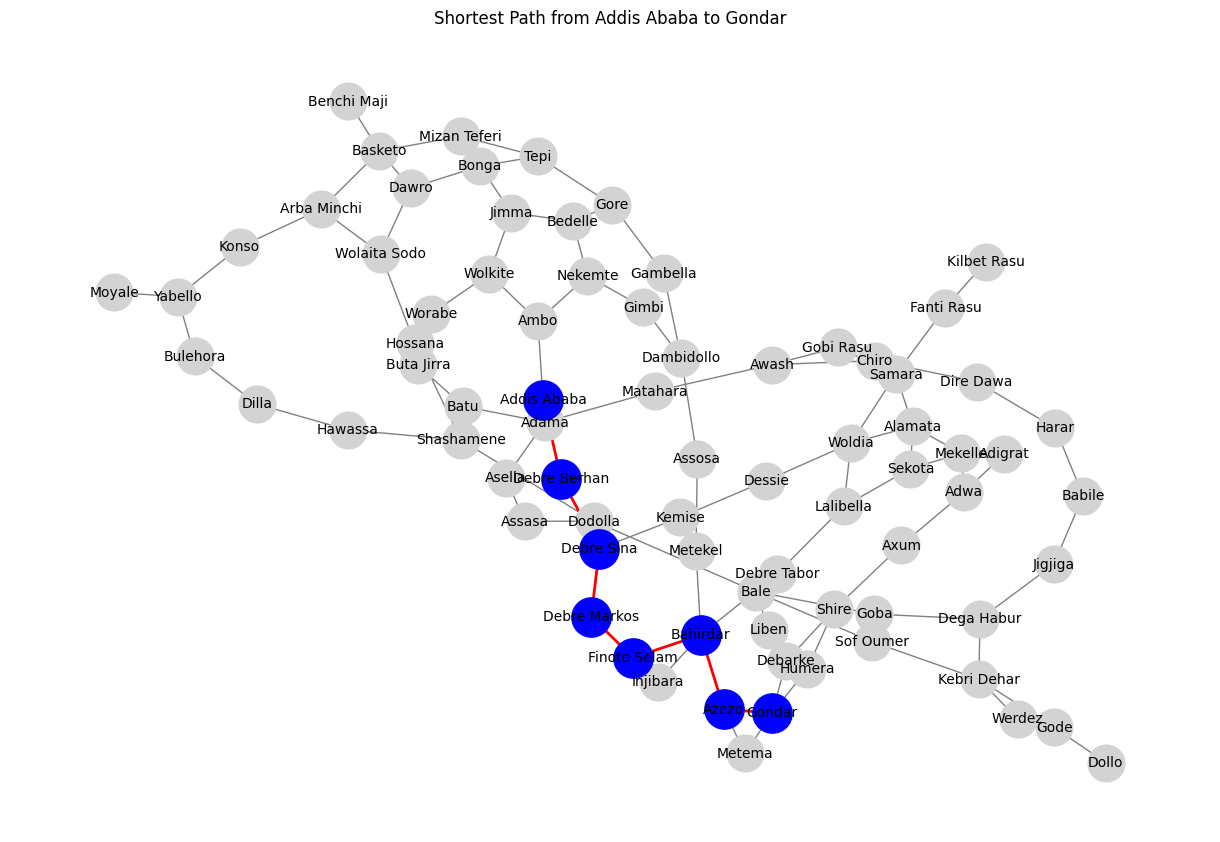

In [4]:

G = nx.Graph()

# Adding nodes and edges
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Visualizing the graph
def visualize_graph_with_path(graph, start, goal):
    # Find the shortest path using BFS
    shortest_path = bfs_shortest_path(graph, start, goal)
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="lightgray", edge_color="gray", node_size=700, font_size=10)

    if shortest_path:
        # Highlight nodes and edges in the shortest path
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="blue", node_size=800)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    # Add title
    plt.title(f"Shortest Path from {start} to {goal}")
    plt.show()

# Step 5: Define start and goal cities
start_city = "Addis Ababa"
goal_city = "Gondar"

# Visualize the graph
visualize_graph_with_path(graph, start_city, goal_city)